In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
class BinomialDistribution:
    def __init__(self, n, p):
        self.n = n
        self.p = p

    def pmf(self, k):
        coef = np.math.comb(self.n, k)
        return coef * (self.p**k) * ((1 - self.p)**(self.n - k))

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, k):
        return sum(self.pmf(i) for i in range(k + 1))

def plot_pmf(x_values1, pmf1, x_values2, pmf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values1, pmf1, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values2, pmf2, basefmt=" ", linefmt="red", markerfmt="ro", label=label2)
    plt.title(title)
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values1, cdf1, x_values2, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.step(x_values1, cdf1, where="mid", label=label1, color='blue')
    plt.step(x_values2, cdf2, where="mid", label=label2, color='red')
    plt.title(title)
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pmf_scipy, pmf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf_scipy, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf_custom, basefmt=" ", linefmt="orange", markerfmt="go", label=label2)
    plt.title(title)
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two binomial distributions
n1, p1 = 10, 0.5
n2, p2 = 15, 0.7

# Generate x values (possible number of successes)
x_binom_1 = np.arange(0, n1 + 1)
x_binom_2 = np.arange(0, n2 + 1)

# Calculate PMF and CDF using scipy
pmf_binom_1_scipy = binom.pmf(x_binom_1, n1, p1)
pmf_binom_2_scipy = binom.pmf(x_binom_2, n2, p2)
cdf_binom_1_scipy = binom.cdf(x_binom_1, n1, p1)
cdf_binom_2_scipy = binom.cdf(x_binom_2, n2, p2)

# Create instances of BinomialDistribution
binom_dist_1 = BinomialDistribution(n1, p1)
binom_dist_2 = BinomialDistribution(n2, p2)

# Calculate PMF and CDF using custom class
pmf_binom_1_custom = np.array([binom_dist_1.pmf(k) for k in x_binom_1])
pmf_binom_2_custom = np.array([binom_dist_2.pmf(k) for k in x_binom_2])

cdf_binom_1_custom = binom_dist_1.cdf(x_binom_1)
cdf_binom_2_custom = binom_dist_2.cdf(x_binom_2)

/tmp/ipykernel_1264481/653824914.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = np.math.comb(self.n, k)


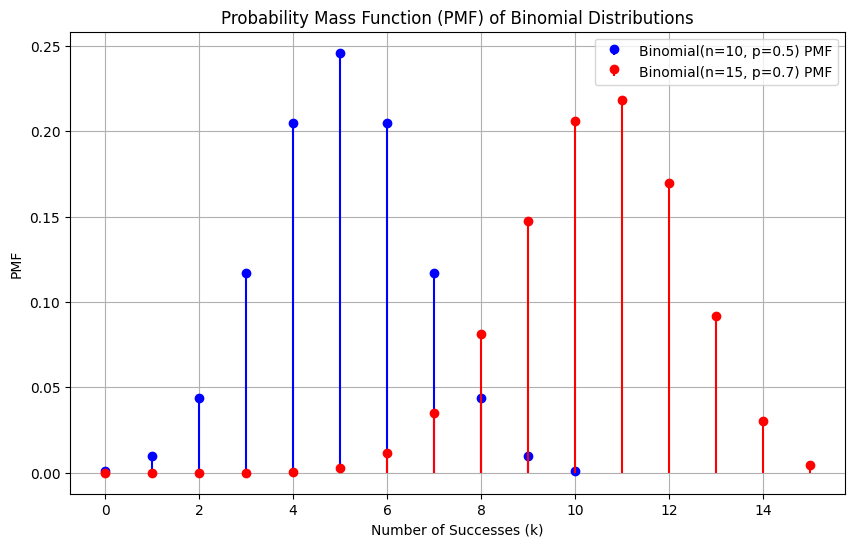

In [4]:
# Plot 1: PMF of Binomial Distributions (Original)
plot_pmf(x_binom_1, pmf_binom_1_scipy, x_binom_2, pmf_binom_2_scipy,
         label1=f'Binomial(n={n1}, p={p1}) PMF', 
         label2=f'Binomial(n={n2}, p={p2}) PMF',
         title='Probability Mass Function (PMF) of Binomial Distributions')


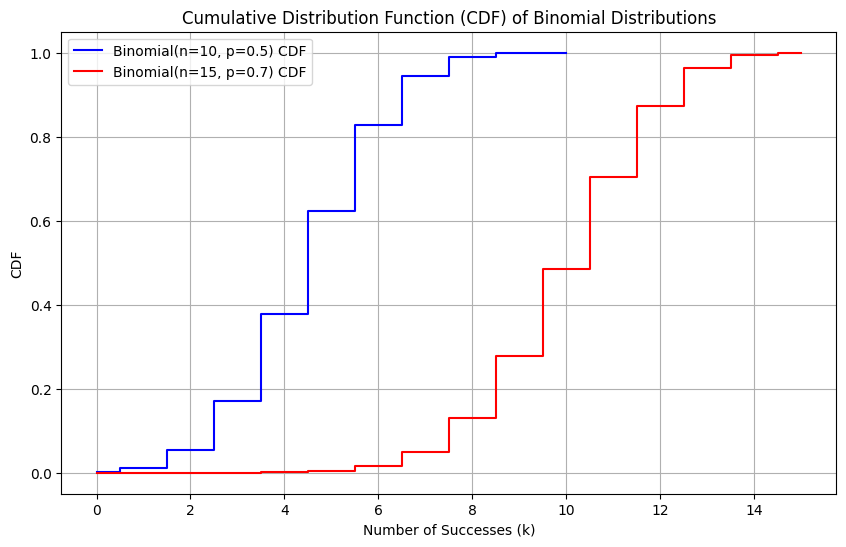

In [5]:
# Plot 2: CDF of Binomial Distributions (Original)
plot_cdf(x_binom_1, cdf_binom_1_scipy, x_binom_2, cdf_binom_2_scipy, 
         label1=f'Binomial(n={n1}, p={p1}) CDF', 
         label2=f'Binomial(n={n2}, p={p2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Binomial Distributions')

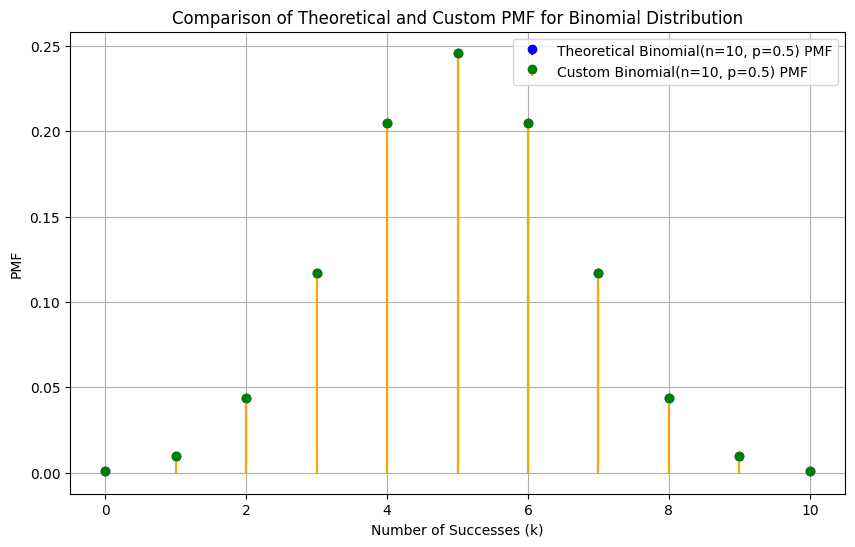

In [6]:
# Plot 3: Comparison of Theoretical and Custom PMFs
plot_comparison(x_binom_1, pmf_binom_1_scipy, pmf_binom_1_custom, 
                label1=f'Theoretical Binomial(n={n1}, p={p1}) PMF', 
                label2=f'Custom Binomial(n={n1}, p={p1}) PMF', 
                title='Comparison of Theoretical and Custom PMF for Binomial Distribution')